In [36]:
from uncertainties import unumpy
from uncertainties import ufloat
from scipy import odr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
print('Reading file...')
df = pd.read_excel("data.xlsx")
print('File read successfully\n\n')

Reading file...
File read successfully




In [38]:
dist = np.array(df['d'])
def_y_down = np.array(df['y_down'])
volt_y_down = np.array(df['V_down'])

def_y_up = np.array(df['y_up'])
volt_y_up = np.array(df['V_up'])

theta_down = np.array(df['theta_down'])
theta_up = np.array(df['theta_up'])

In [39]:
errDist = 0.1 #cm
errVolt = 0.1 #V
errDeg = 0.1 #deg

initialPos = ufloat(0.3, errDist) #initla posiition of dot at 0 voltage

In [40]:
dist = unumpy.uarray(dist, errDist)
def_y_down = (np.abs(unumpy.uarray(def_y_down, errDist)) - initialPos)/100
volt_y_down = unumpy.uarray(volt_y_down, errVolt)

def_y_up = (np.abs(unumpy.uarray(def_y_up, errDist)) - initialPos)/100
volt_y_up = unumpy.uarray(volt_y_up, errVolt)

theta_down = unumpy.radians( unumpy.uarray(theta_down, errDeg))
theta_up = unumpy.radians(unumpy.uarray(theta_up, errDeg))

V_up = def_y_up*volt_y_up
V_down = def_y_down*volt_y_down

In [41]:
tan2_down = unumpy.tan(theta_down)**2
tan2_up = unumpy.tan(theta_up)**2

In [42]:
upData = odr.RealData(unumpy.nominal_values(tan2_up), unumpy.nominal_values(V_up), sx=unumpy.std_devs(tan2_up), sy=unumpy.std_devs(V_up))
downData = odr.RealData(unumpy.nominal_values(tan2_down), unumpy.nominal_values(V_down), sx=unumpy.std_devs(tan2_down), sy=unumpy.std_devs(V_down))

ordUp = odr.ODR(upData, odr.unilinear)
odrDown = odr.ODR(downData, odr.unilinear)

output_up, output_down = ordUp.run(), odrDown.run()

slopeUp, interceptUp = output_up.beta
slopUpErr, interceptUpErr = output_up.sd_beta

slopeDown, interceptDown = output_down.beta
slopeDownErr, interceptDownErr = output_down.sd_beta

print(slopeUp)
print(slopeDown)


-0.060419976515945994
0.020486158284719225


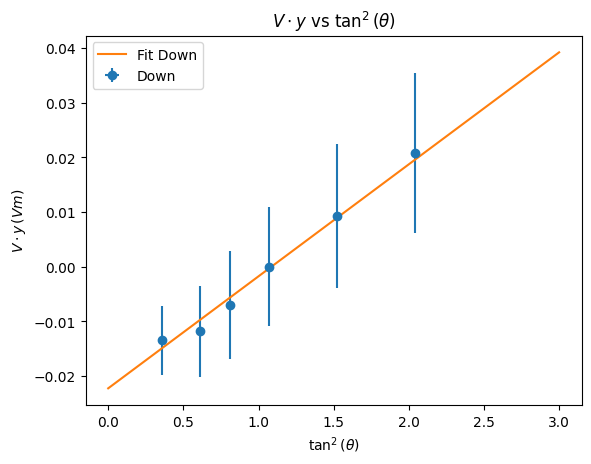

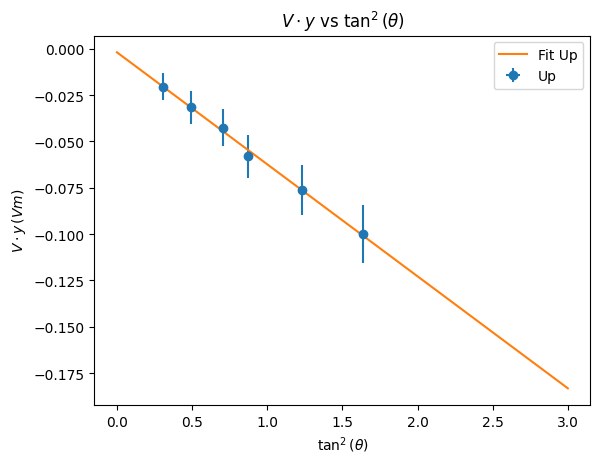

In [43]:
#ploting V vs tan^2(theta) and the fit
plt.errorbar(unumpy.nominal_values(tan2_down), unumpy.nominal_values(V_down), xerr=unumpy.std_devs(tan2_down), yerr=unumpy.std_devs(V_down), fmt='o', label='Down')
plt.plot(np.linspace(0, 3, 100), slopeDown*np.linspace(0, 3, 100) + interceptDown, label='Fit Down')
plt.xlabel(r'$\tan^2(\theta)$')
plt.ylabel(r'$V \cdot y \, (Vm)$')
plt.title(r'$V \cdot y$ vs $\tan^2(\theta)$')
plt.legend()
plt.show()


plt.errorbar(unumpy.nominal_values(tan2_up), unumpy.nominal_values(V_up), xerr=unumpy.std_devs(tan2_up), yerr=unumpy.std_devs(V_up), fmt='o', label='Up')
plt.plot(np.linspace(0, 3, 100), slopeUp*np.linspace(0, 3, 100) + interceptUp, label='Fit Up')
plt.xlabel(r'$\tan^2(\theta)$')
plt.ylabel(r'$V \cdot y\, (Vm)$')
plt.title(r'$V \cdot y$ vs $\tan^2(\theta)$')
plt.legend()

plt.show()

In [44]:
e_by_m1 =  abs(ufloat(slopeUp, slopUpErr) / (3.81e-5 * 3.81e-5 * 106.7e-6))
e_by_m2 = abs(ufloat(slopeDown, slopeDownErr) / (3.81e-5 * 3.81e-5 * 106.7e-6))

print(e_by_m1)
print(e_by_m2)

(3.90+/-0.13)e+11
(1.32+/-0.09)e+11


In [45]:
print(np.mean([e_by_m1, e_by_m2]))

(2.61+/-0.08)e+11


In [46]:
tableUp = pd.DataFrame({
    'position': dist,
    'Spot deflection': def_y_up,
    'Voltage Deflection': volt_y_up,
    'Yy': V_up,
    'Theta': unumpy.degrees(theta_up),
    'tan theta': unumpy.tan(theta_up),
    'tan^2(theta)': tan2_up
})

tableDown = pd.DataFrame({
    'position': dist,
    'Spot deflection': def_y_down,
    'Voltage Deflection': volt_y_down,
    'Yy': V_down,
    'Theta': unumpy.degrees(theta_down),
    'tan theta': unumpy.tan(theta_down),
    'tan^2(theta)': tan2_down
})


tableUp.to_csv('upData.csv', index=False)
tableDown.to_csv('downData.csv', index=False)
print('Data saved to upData.csv and downData.csv')

Data saved to upData.csv and downData.csv
